In [1]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10

from keras.models import Sequential
from keras.layers import *

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

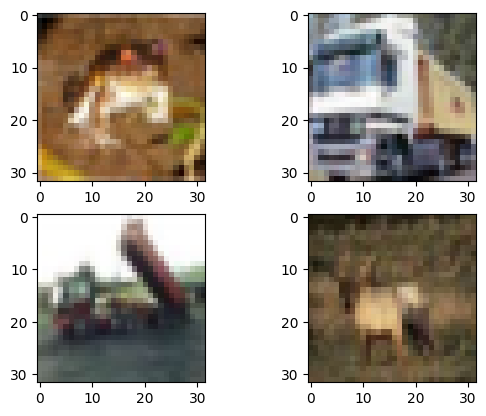

In [3]:
fig, ax = plt.subplots(2, 2)

k=0
for i in range(2):
    for j in range(2):
        ax[i][j].imshow(X_train[k])
        k +=1

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
model =Sequential([

    Flatten(input_shape=(32, 32, 3)),

    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),

    Dense(10, activation='softmax')
])

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,443,338 (13.14 MB)

 Trainable params: 3,443,338 (13.14 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.evaluate

<bound method TensorFlowTrainer.evaluate of <Sequential name=sequential, built=True>>

In [10]:
model_history = model.fit(X_train, y_train,
                   epochs=20, batch_size=256,
                   validation_split=0.2)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.2696 - loss: 2.0253 - val_accuracy: 0.2892 - val_loss: 1.9605
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3641 - loss: 1.7747 - val_accuracy: 0.3761 - val_loss: 1.7405
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.4024 - loss: 1.6735 - val_accuracy: 0.3859 - val_loss: 1.7295
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.4299 - loss: 1.6013 - val_accuracy: 0.4367 - val_loss: 1.5901
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.4439 - loss: 1.5516 - val_accuracy: 0.4439 - val_loss: 1.5643
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.4591 - loss: 1.5141 - val_accuracy: 0.4509 - val_loss: 1.5723
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.4691 - loss: 1.4838 - val_accuracy: 0.4570 - val_loss: 1.5302
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.4877 - loss: 1.4427 - val_ac

In [ ]:
model_history.history

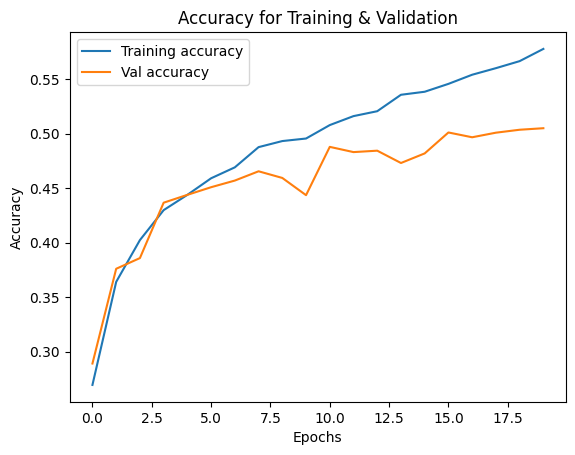

In [11]:
# plot accuracy for training & validation
plt.plot(model_history.history['accuracy'] , label = 'Training accuracy')
plt.plot(model_history.history['val_accuracy'] , label = 'Val accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy for Training & Validation')
plt.show()

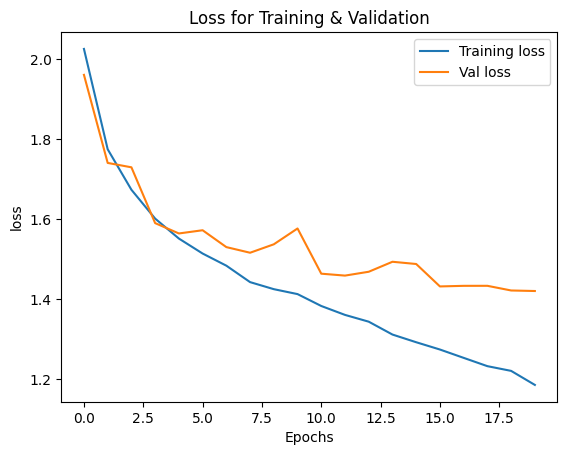

In [12]:
# plot accuracy for training & validation
plt.plot(model_history.history['loss'] , label = 'Training loss')
plt.plot(model_history.history['val_loss'] , label = 'Val loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss for Training & Validation')
plt.show()